<h2> Shirley Yurani Pereira Cubillos </h2>

<h3>Regresión logistica - Predicción de supervivencia</h3>

<h4> 1.Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc. </h4>

In [88]:
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [89]:
dataset = pd.read_csv('./Titanic-Dataset.csv')

In [90]:
dataset.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [91]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos De Tarifa de pasajero ')

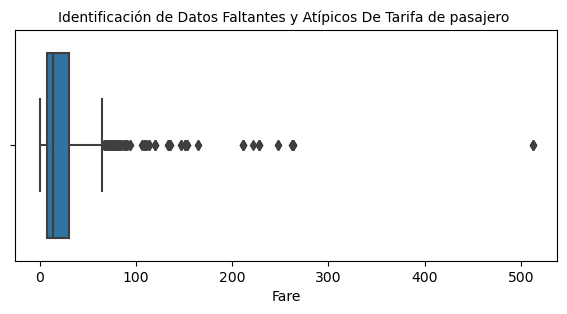

In [92]:
plt.figure(figsize=(7, 3))
sns.boxplot(x=dataset['Fare'])
plt.title('Identificación de Datos Faltantes y Atípicos De Tarifa de pasajero ', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos De Número de hermanos / cónyuges a bordo ')

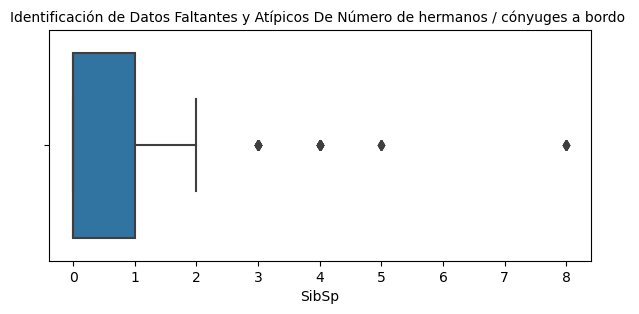

In [93]:
plt.figure(figsize=(7, 3))
sns.boxplot(x=dataset['SibSp'])
plt.title('Identificación de Datos Faltantes y Atípicos De Número de hermanos / cónyuges a bordo ', fontsize=10 )

<h4>2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario</h4>

In [94]:
print("Cantidad de Registros con cero en Edad: ",dataset['Age'].isin([0]).sum())
print("Cantidad de Registros nulos en Edad: ",dataset['Age'].isna().sum())
print("Cantidad de Registros con cero en Tarifa de pasajero: ",dataset['Fare'].isin([0]).sum())

Cantidad de Registros con cero en Edad:  0
Cantidad de Registros nulos en Edad:  177
Cantidad de Registros con cero en Tarifa de pasajero:  15


In [95]:
dataset['Fare']=dataset['Fare'].replace(0,dataset['Fare'].mean())

In [96]:
print("Cantidad de Registros con cero en Tarifa de pasajero: ",dataset['Fare'].isin([0]).sum())

Cantidad de Registros con cero en Tarifa de pasajero:  0


In [97]:
dataset = dataset.dropna(subset=['Age'])

In [98]:
print("Cantidad de Registros nulos en Edad: ",dataset['Age'].isna().sum())

Cantidad de Registros nulos en Edad:  0


In [99]:
nivel_minimo=0
nivel_maximo=2
Total_Atipicos=((dataset['SibSp']<nivel_minimo)|(dataset['SibSp']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 35


In [100]:
dataset=dataset[(dataset['SibSp']<nivel_maximo)&(dataset['SibSp']>nivel_minimo)]

In [101]:
Total_Atipicos=((dataset['SibSp']<nivel_minimo)|(dataset['SibSp']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [102]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 0 to 874
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        64 non-null     object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


<h4> 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características </h4>

<h6> Característica de importancia </h6>

</h7>Survived: Si el pasajero sobrevivió o no (0 = no sobrevivió - 1 = si sobrevivió)</h7>

In [103]:
dataset['Survived'].value_counts()

Survived
1    97
0    86
Name: count, dtype: int64

In [104]:
dataset[['Survived']].head(40)

,Survived
0,0
1,1
3,1
9,1
10,1
13,0
18,0
25,1
34,0
35,0


<h4>4. Dividir el dataset en Train y Test para evaluar correctamente el modelo</h4>

In [109]:
# Se cargan los datos de train sin los datos de la columna Survived
X = dataset.drop('Survived',axis=1) 
X = X.drop('PassengerId',axis=1)
X = X.drop('Name',axis=1)
X = X.drop('Ticket',axis=1)
X = X.drop('Cabin',axis=1)

# Se cargan los datos de train convirtiendo male a 0 y female a 1 en SEX para que se pueda realizar el análisis
dataset['Sex'] = dataset['Sex'].replace({'male': 0, 'female': 1})

# Se cargan los datos de train convirtiendo C a 0, Q a 1, S a 2 en EMBARKED para que se pueda realizar el análisis
dataset['Embarked'] = dataset['Embarked'].replace({'C': 0, 'Q': 1, 'S':2})

Y = dataset['Survived'] # Se cargan los datos de train con los datos de la la columna condition

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [110]:
print (X_train)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
348       3    0   3.0      1      1   15.900         2
440       2    1  45.0      1      1   26.250         2
546       2    1  19.0      1      0   26.000         2
215       1    1  31.0      1      0  113.275         0
224       1    0  38.0      1      0   90.000         2
..      ...  ...   ...    ...    ...      ...       ...
754       2    1  48.0      1      2   65.000         2
40        3    1  40.0      1      0    9.475         2
230       1    1  35.0      1      0   83.475         2
781       1    1  17.0      1      0   57.000         2
518       2    1  36.0      1      0   26.000         2

[137 rows x 7 columns]


In [111]:
print (Y_train)

348    1
440    1
546    1
215    1
224    1
      ..
754    1
40     0
230    1
781    1
518    1
Name: Survived, Length: 137, dtype: int64


<h4>5. Entrenar el modelo configurando los diferentes hiperparámetros</h4>

In [112]:
#modelo de regresion logistica
modelo_regresion = LogisticRegression(solver = "liblinear") 
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) 

In [113]:
print (Prediccion)

[1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0
 0 1 1 0 0 0 0 0 1]


<h4>6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc</h4>

In [114]:
print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78        22
           1       0.82      0.75      0.78        24

    accuracy                           0.78        46
   macro avg       0.78      0.78      0.78        46
weighted avg       0.79      0.78      0.78        46



<h4>7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo</h4>

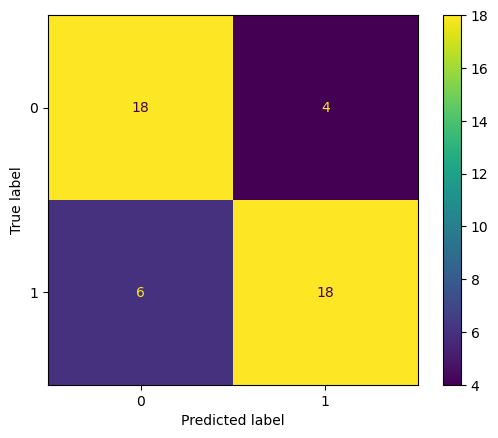

In [115]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

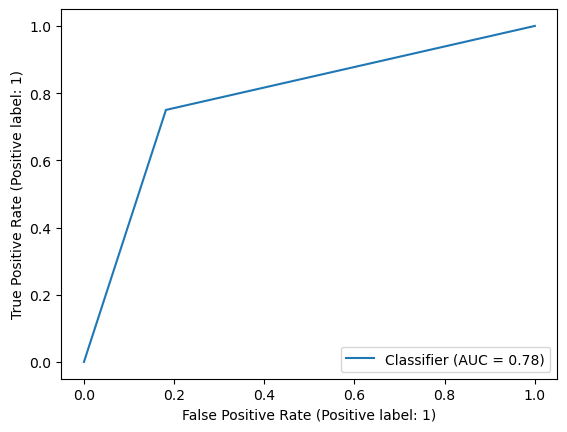

In [116]:
#curva de precisión 
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

<h4>8. Interpretar, analizar y documentar los resultados obtenidos</h4>

- La precisión se refiere a la proporción de predicciones correctas entre todas las predicciones positivas realizadas por el modelo. Para la clase 'Survived', la precisión es del 82%, lo que significa que el 82% de los casos que el modelo identificó como sobrevivientes fueron correctos.
- El Recall, o la tasa de verdaderos positivos, representa la proporción de instancias positivas reales que fueron identificadas correctamente por el modelo entre todas las instancias positivas reales en el conjunto de datos. En el caso de la clase 'Survived', el Recall es del 75%, lo que significa que el modelo identificó correctamente al 75% de todos los sobrevivientes en el conjunto de datos.
- El F1 Score, una medida que combina precisión y recall en una sola métrica, proporciona una evaluación equilibrada del desempeño del modelo. Para la clase 'Survived', el F1 Score es de 0.78, lo que indica un equilibrio entre precisión y recall, demostrando una buena capacidad del modelo para identificar y clasificar sobrevivientes de manera precisa y exhaustiva.
- El indicador "support" se refiere al número de instancias verdaderas de cada clase en el conjunto de datos. Para la clase 'Survived', el support es de 24, lo que significa que hay 24 casos reales de sobrevivientes en el conjunto de datos..







De la Matriz de Confusión podemos inferir:

- Verdaderos negativos: Representan el número de observaciones que el clasificador predijo correctamente como falsas, con un total de 18 casos.
- Verdaderos positivos: Corresponden al número de observaciones que el clasificador predijo correctamente como verdaderas, contabilizando 18 casos correctamente identificados.
- Falsos positivos: Indican el número de observaciones que el clasificador predijo incorrectamente como verdaderas cuando en realidad eran falsas, con un total de 4 casos erróneos.
- Falsos negativos: Reflejan el número de observaciones que el clasificador predijo incorrectamente como falsas cuando en realidad eran verdaderas, sumando un total de 6 casos mal clasificados.

De la Curva de Precisión del modelo podemos interpretar:
- El AUC (Área Bajo la Curva) es de 0.78, lo que indica que el 78% de las predicciones del clasificador son correctas en todos los umbrales de clasificación. Esta métrica proporciona una medida de la capacidad del modelo para discriminar entre clases positivas y negativas, donde un valor más cercano a 1 representa un mejor rendimiento del clasificador en la clasificación. En este caso, la conclusión sería que el clasificador tiene una capacidad razonable para discriminar entre clases, pero puede haber margen para mejorar su rendimiento. Sería útil explorar otras métricas y realizar ajustes en el modelo o en los datos según sea necesario para optimizar aún más su rendimiento.